# MBI CI03 Introduction to dynamic programming

## Example 1: Minimum coin count

Assume we (infinite amount of) coins of values $a_1, \ldots, a_k$ (positive integers).
For a given positive integer $N$, find the smallest amount of coins (of the given denominations) with sum equal to $N$.

In [ ]:
def coins_greedy(N, denominations):
  """Use the most valuable coin as much as possible, then move to the second
  most valuable, and so on."""
  optimum, instance = 0, []
  for denomination in sorted(denominations, reverse=True):
    coin_amount = N // denomination
    optimum += coin_amount
    instance.extend([denomination] * coin_amount)
    N %= denomination
  if N == 0:
    return optimum, instance
  else:
    return None

# testing
print(f"{coins_greedy(10, (1, 2, 5))=}")
print(f"{coins_greedy(10, (1, 2, 4))=}")
print(f"{coins_greedy(10, (1, 2, 3))=}")
print(f"{coins_greedy(10, (1, 3, 4))=}")
print(f"{coins_greedy(6, (1, 3, 4))=} (sic!)")

coins_greedy(10, (1, 2, 5))=(2, [5, 5])
coins_greedy(10, (1, 2, 4))=(3, [4, 4, 2])
coins_greedy(10, (1, 2, 3))=(4, [3, 3, 3, 1])
coins_greedy(10, (1, 3, 4))=(4, [4, 4, 1, 1])
coins_greedy(6, (1, 3, 4))=(3, [4, 1, 1]) (sic!)


In [ ]:
import math

def coins_dp(N, denominations):
  A = [math.inf for _ in range(N+1)]  # A[x] - optimum for total sum x
  A[0] = 0 # initial condition/simplest case

  for i in range(1, N+1):
    # optimum = min([A[i-c] + 1 if i - c >= 0 else math.inf for c in denominations])
    optimum = math.inf
    for c in denominations:
      if i - c >= 0:
        optimum = min(optimum, A[i-c] + 1)
    A[i] = optimum
  print(f"DP table for cs={denominations}:")
  print(f"{A=}")
  return A[N]

# testing
print(f"{coins_dp(10, (1, 2, 5))=}")
print(f"{coins_dp(10, (1, 2, 4))=}")
print(f"{coins_dp(10, (1, 2, 3))=}")
print(f"{coins_dp(10, (1, 3, 4))=}")
print(f"{coins_dp(6, (1, 3, 4))=} (sic!)")

DP table for cs=(1, 2, 5):
A=[0, 1, 1, 2, 2, 1, 2, 2, 3, 3, 2]
coins_dp(10, (1, 2, 5))=2
DP table for cs=(1, 2, 4):
A=[0, 1, 1, 2, 1, 2, 2, 3, 2, 3, 3]
coins_dp(10, (1, 2, 4))=3
DP table for cs=(1, 2, 3):
A=[0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4]
coins_dp(10, (1, 2, 3))=4
DP table for cs=(1, 3, 4):
A=[0, 1, 2, 1, 1, 2, 2, 2, 2, 3, 3]
coins_dp(10, (1, 3, 4))=3
DP table for cs=(1, 3, 4):
A=[0, 1, 2, 1, 1, 2, 2]
coins_dp(6, (1, 3, 4))=2 (sic!)


In [ ]:
def coins_dp_with_reconstruction(N, denominations):
  A = [math.inf for _ in range(N+1)]  # A[x] - optimum for total sum x
  A[0] = 0 # initial condition/simplest case
  B = [None for _ in range(N+1)]  # B[x] - optimal choice for total sum x
  B[0] = 0  # no choice required

  for i in range(1, N+1):
    # optimum, choice = min([(A[i-c] + 1, c) if i - c >= 0 else math.inf for c in denominations])
    optimum, choice = math.inf, None
    for c in denominations:
      if i - c >= 0:
        potential_optimum = A[i-c] + 1
        if potential_optimum < optimum:
          optimum, choice = potential_optimum, c
    A[i], B[i] = optimum, choice
  print(f"DP table for cs={denominations}:")
  print(f"{A=}")
  print(f"Choices table for cs={denominations}:")
  print(f"{B=}")

  # reconstruction of the optimal solution by backtracking
  optimal_instance = []
  position = N
  while position > 0:
    optimal_instance.append(B[position])
    position -= B[position]
  return A[N], optimal_instance

# testing
print(f"{coins_dp_with_reconstruction(10, (1, 2, 5))=}\n")
print(f"{coins_dp_with_reconstruction(10, (1, 2, 4))=}\n")
print(f"{coins_dp_with_reconstruction(10, (1, 2, 3))=}\n")
print(f"{coins_dp_with_reconstruction(10, (1, 3, 4))=}\n")
print(f"{coins_dp_with_reconstruction(6, (1, 3, 4))=}\n")


DP table for cs=(1, 2, 5):
A=[0, 1, 1, 2, 2, 1, 2, 2, 3, 3, 2]
Choices table for cs=(1, 2, 5):
B=[0, 1, 2, 1, 2, 5, 1, 2, 1, 2, 5]
coins_dp_with_reconstruction(10, (1, 2, 5))=(2, [5, 5])

DP table for cs=(1, 2, 4):
A=[0, 1, 1, 2, 1, 2, 2, 3, 2, 3, 3]
Choices table for cs=(1, 2, 4):
B=[0, 1, 2, 1, 4, 1, 2, 1, 4, 1, 2]
coins_dp_with_reconstruction(10, (1, 2, 4))=(3, [2, 4, 4])

DP table for cs=(1, 2, 3):
A=[0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4]
Choices table for cs=(1, 2, 3):
B=[0, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1]
coins_dp_with_reconstruction(10, (1, 2, 3))=(4, [1, 3, 3, 3])

DP table for cs=(1, 3, 4):
A=[0, 1, 2, 1, 1, 2, 2, 2, 2, 3, 3]
Choices table for cs=(1, 3, 4):
B=[0, 1, 1, 3, 4, 1, 3, 3, 4, 1, 3]
coins_dp_with_reconstruction(10, (1, 3, 4))=(3, [3, 3, 4])

DP table for cs=(1, 3, 4):
A=[0, 1, 2, 1, 1, 2, 2]
Choices table for cs=(1, 3, 4):
B=[0, 1, 1, 3, 4, 1, 3]
coins_dp_with_reconstruction(6, (1, 3, 4))=(2, [3, 3])



# Example 2: MS/MS Protein reconstruction, part I

In [ ]:
amino_acids = "ARNDCEQGHILKMFPSTWYV"
amino_acids_weights = [
    71, 156, 114, 115, 103,
    129, 128, 57, 137, 113,
    113, 128, 131, 147, 97,
    87, 101, 151, 186, 163,
]
assert(len(amino_acids) == len(amino_acids_weights))

def protein_weight(sequence):
  global amino_acids, amino_acids_weights
  return sum(amino_acids_weights[amino_acids.index(x)] for x in sequence)

# testing
print(f"{protein_weight('LASVEGAS')=}")
print(f"{protein_weight('HARRY')=}")

def print_prefix_weights(sequence):
  for i in range(1, len(sequence)+1):
    print(f"w({sequence[:i]})={protein_weight(sequence[:i])}")

def print_suffix_weights(sequence):
  for i in range(len(sequence)):
    print(f"w({sequence[i:]})={protein_weight(sequence[i:])}")

# testing
print_prefix_weights("LASVEGAS")
print()
print_suffix_weights("LASVEGAS")

protein_weight('LASVEGAS')=778
protein_weight('HARRY')=706
w(L)=113
w(LA)=184
w(LAS)=271
w(LASV)=434
w(LASVE)=563
w(LASVEG)=620
w(LASVEGA)=691
w(LASVEGAS)=778

w(LASVEGAS)=778
w(ASVEGAS)=665
w(SVEGAS)=594
w(VEGAS)=507
w(EGAS)=344
w(GAS)=215
w(AS)=158
w(S)=87


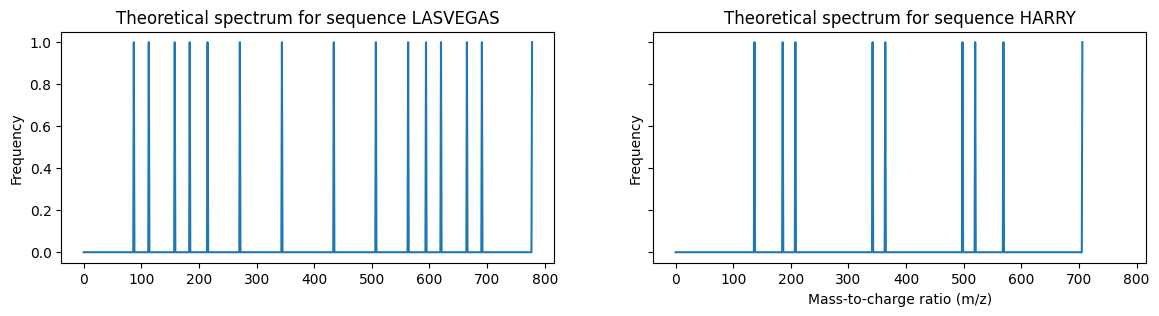

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def ideal_spectrum(sequence):
  total_weight = protein_weight(sequence)
  spectrum = np.zeros(total_weight+1)
  for i in range(len(sequence)):
    prefix_weight = protein_weight(sequence[:i])
    suffix_weight = protein_weight(sequence[i:])
    if prefix_weight > 0:
      spectrum[prefix_weight] += 1
    if suffix_weight > 0:
      spectrum[suffix_weight] += 1
  return spectrum


sequences = ("LASVEGAS", "HARRY")
fig, ax = plt.subplots(ncols=len(sequences), figsize=(7 * len(sequences), 3), sharey=True, sharex=True)
ax[-1].set_xlabel("Mass-to-charge ratio (m/z)")
for snum, sequence in enumerate(sequences):
  spectrum = ideal_spectrum(sequence)
  ax[snum].plot(spectrum, label="ideal")
  ax[snum].set_title(f"Theoretical spectrum for sequence {sequence}")
  ax[snum].set_ylabel("Frequency")
fig.show()

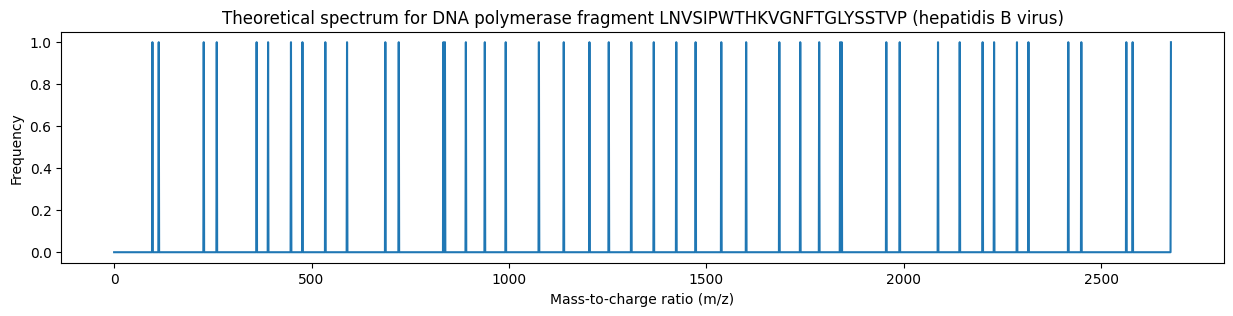

In [ ]:
dna_polymerase = """MPLSYQHFRKLLLLDDGTEAGPLEEELPRLADADLNRRVAEDLNLGNLNVSIPWTHKVGNFTGLYSSTVP
IFNPEWQTPSFPKIHLHEDIINRCQQFVGPLTVNEKRRLKLIMPARFYPNSTKYLPLDKGIKPYYPDQVV
NHYFQARHYLHTLWKAGILYKRETTRSASFCGSPYSWEQELQHGRLVTKTSQRHGDKSFCSQSSGILSRS
SVGPCIRSQLKQSRLGLQPHQGSLATSQSGRSGSIWARVHPSTRRCSGVEPSGSGHIDYRASSSSSCLHQ
SAVRKAAYSHLSTSKRQSSAGHAVEFHSFPPSSTRSQSQGPVFSCWWLQFRNSKPCSEYCLSHLVNLLED
WGPCTDHGEHHIRIPRTPARVTGGVFLVDKNPHNTAESRLVVDFSQFSRGITRVSWPKFAVPNLQSLTNL
LSSNLSWLSLDVSAAFYHIPLHPAAMPHLLVGSSGLSRYVARLSSNSRIHNHQYGTLQNLHDSCTRQLYV
SLMLLYKTYGRKLHLYSHPIILGFRKIPMGVGLSPFLLAQFTSAICSVVRRAFPHCLAFSYMDDVVLGAK
SIQHLESLYTAVTNFLLSLGIHLNPNKTKRWGYSLNFMGYIIGCWGSLPQDHIVHKIKDCFRKLPVNRPI
DWKVCQRIVGLLGFAAPFTQCGYPALMPLYACIQAKQAFTFSPTYKAFLSKQYMNLYPVARQRPGLCQVF
ADATPTGWGLAMGHQRMRGTFVAPLPIHTAELLAACFARSRSGAKLIGTDNSVVLSRKYTSFPWLLGCTA
NWILRGTSFVYVPSALNHADDPSRGRLGLYRPLLRLPFRPTTGRTSLYAVSPSVPSHLPDRVHFASPLHV
AWRPP
""".strip().replace("\n","")[47:70]

fig, ax = plt.subplots(figsize=(15, 3))
ax.set_xlabel("Mass-to-charge ratio (m/z)")
spectrum = ideal_spectrum(dna_polymerase)
ax.plot(spectrum, label="ideal")
ax.set_title(f"Theoretical spectrum for DNA polymerase fragment {dna_polymerase} (hepatidis B virus)")
ax.set_ylabel("Frequency")
fig.show()


Real protein spectrum:

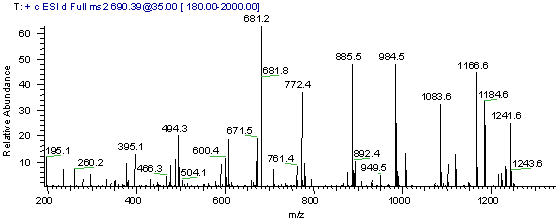

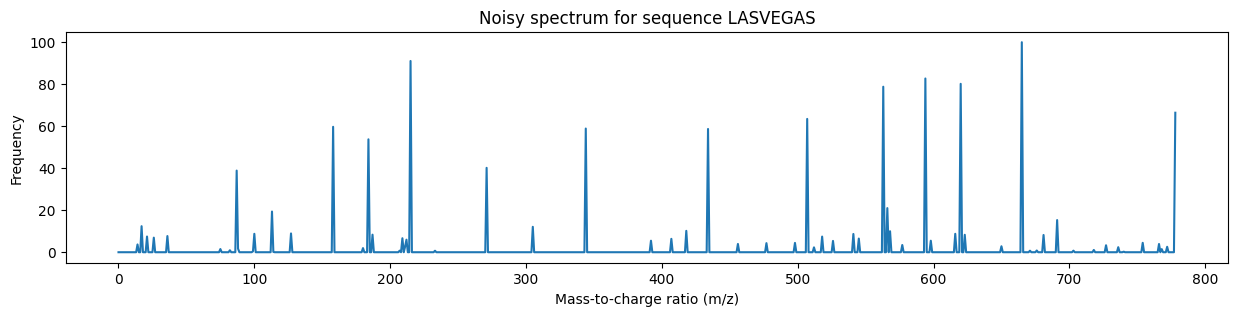

In [ ]:
import scipy

def noisy_spectrum(sequence):
  theoretical_spectrum = ideal_spectrum(sequence)
  S = len(theoretical_spectrum)
  noise = scipy.stats.bernoulli.rvs(size=S, p=0.07) * np.abs(scipy.stats.norm.rvs(size=S, loc=0, scale=7))
  spectrum = theoretical_spectrum * np.abs(scipy.stats.norm.rvs(size=S, loc=50, scale=25)) + noise

  return spectrum


sequence = "LASVEGAS"
fig, ax = plt.subplots(figsize=(15, 3))
ax.set_xlabel("Mass-to-charge ratio (m/z)")
spectrum = noisy_spectrum(sequence)
ax.plot(spectrum, label="noisy")
ax.set_title(f"Noisy spectrum for sequence {sequence}")
ax.set_ylabel("Frequency")
fig.show()

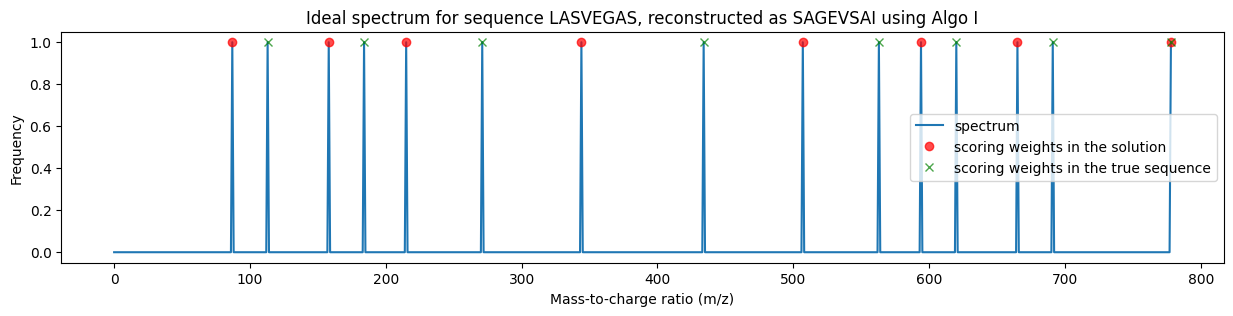

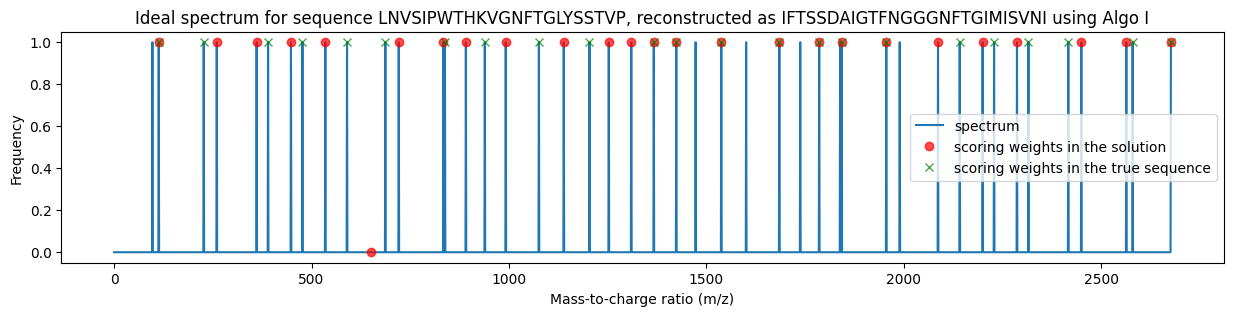

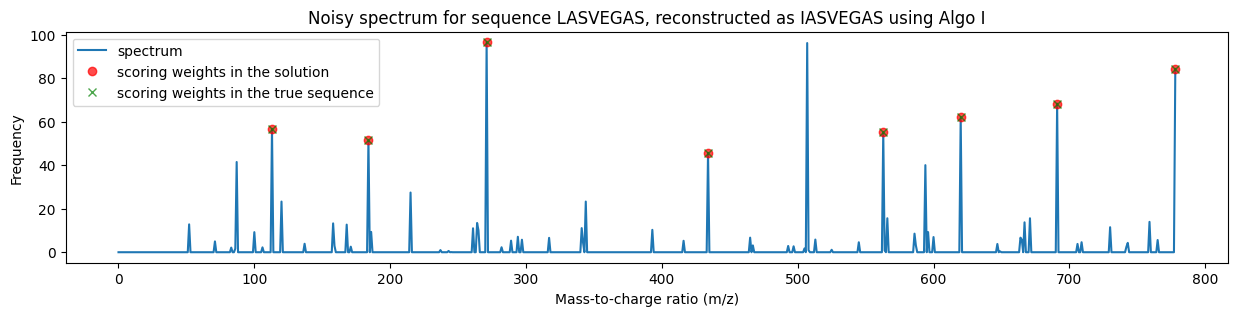

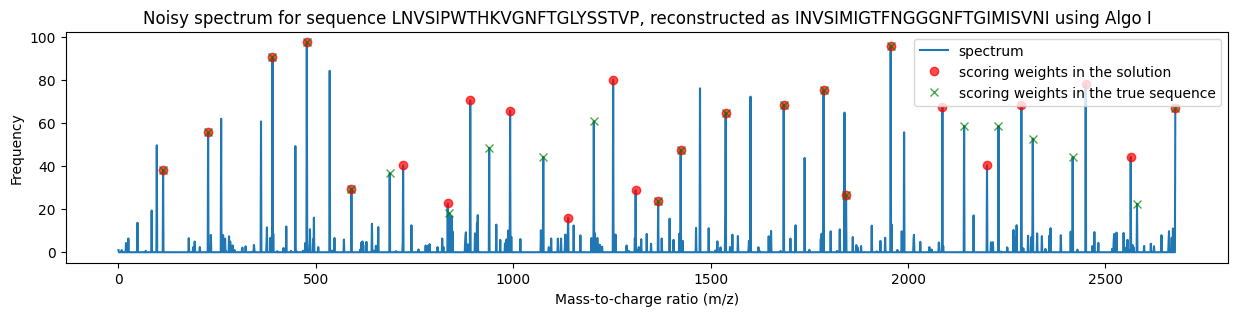

In [ ]:
def reconstruct_protein_prefixes(mass, spectrum):
  global amino_acids, amino_acids_weights
  A = [-math.inf for _ in range(mass+1)]
  A[0] = spectrum[0]
  B = [None for _ in range(mass+1)]
  B[0] = None

  for i in range(1, mass+1):
    for k, weight in enumerate(amino_acids_weights):
      if (residual_weight := i - weight) >= 0:
        candidate = A[residual_weight] + spectrum[i]
        if candidate > A[i]:
          A[i], B[i] = candidate, k

  # reconstruction
  optimal_instance = []
  residual_weight = mass
  while residual_weight > 0:
    assert 0 <= B[residual_weight] < len(amino_acids), f"{len(amino_acids)=}, {B[residual_weight]=}"
    optimal_instance.append(amino_acids[B[residual_weight]])
    residual_weight -= amino_acids_weights[B[residual_weight]]
  return "".join(optimal_instance)[::-1]


for sn, spectrum_f in enumerate((ideal_spectrum, noisy_spectrum)):
  for sequence in ("LASVEGAS", dna_polymerase):
    spectrum = spectrum_f(sequence)
    reconstructed_protein = reconstruct_protein_prefixes(mass=protein_weight(sequence), spectrum=spectrum)
    fig, ax = plt.subplots(figsize=(15, 3))
    ax.set_xlabel("Mass-to-charge ratio (m/z)")
    ax.plot(spectrum, label="spectrum")
    prefix_weights = [protein_weight(reconstructed_protein[:i]) for i in range(1, len(reconstructed_protein)+1)]
    true_prefix_weights = [protein_weight(sequence[:i]) for i in range(1, len(sequence)+1)]
    ax.plot(prefix_weights, spectrum[prefix_weights],
            'o', color="red", alpha=0.7, label="scoring weights in the solution")
    ax.plot(true_prefix_weights, spectrum[true_prefix_weights],
            'x', color="green", alpha=0.7, label="scoring weights in the true sequence")
    ax.set_title(f"{'Ideal' if sn == 0 else 'Noisy'} spectrum for sequence {sequence}, reconstructed as {reconstructed_protein} using Algo I")
    ax.set_ylabel("Frequency")
    ax.legend()
    fig.show()



## Example 3: MS/MS Protein reconstruction, part II

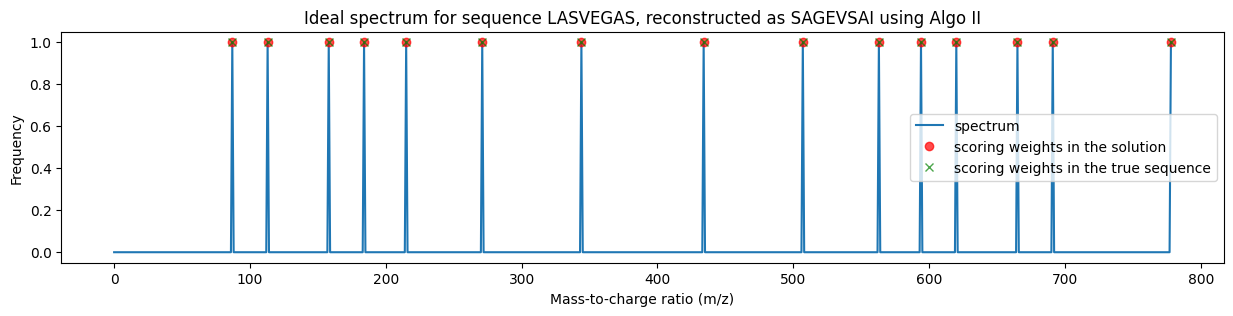

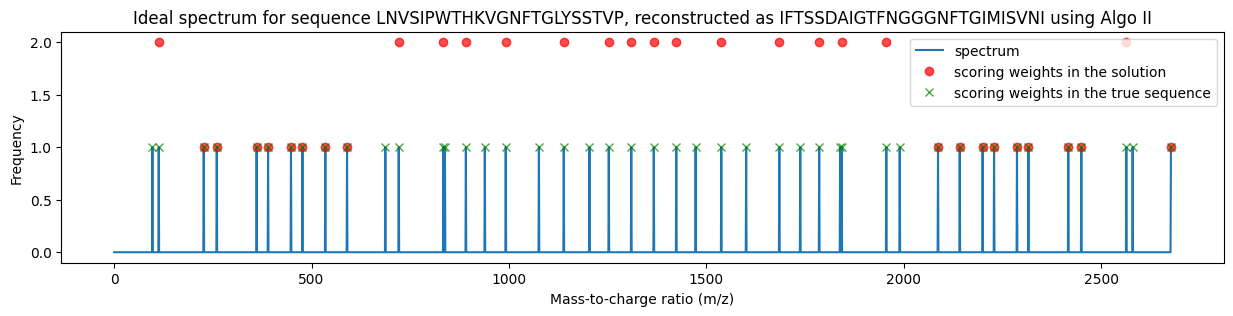

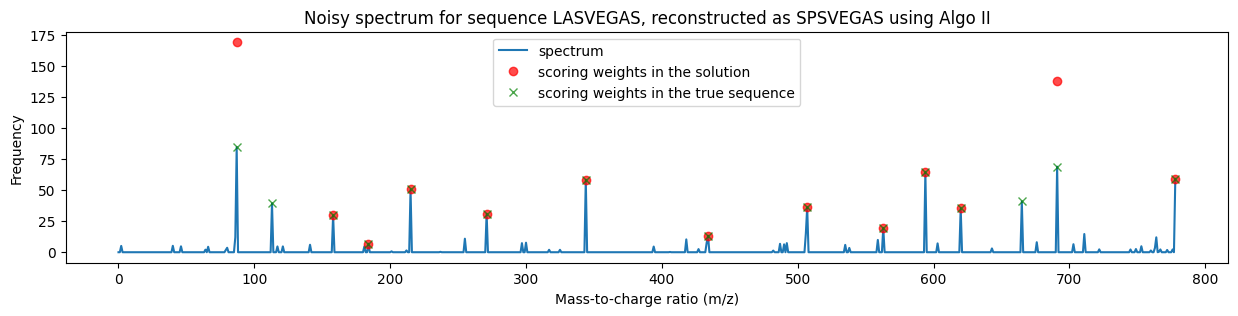

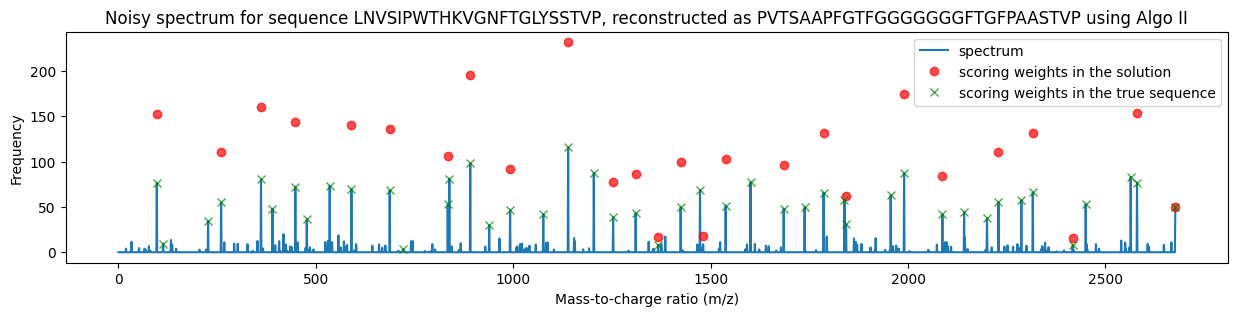

In [ ]:
def reconstruct_protein_prefixes_and_suffixes(mass, spectrum):
  global amino_acids, amino_acids_weights
  new_spectrum = spectrum + spectrum[::-1]
  solution = reconstruct_protein_prefixes(mass, new_spectrum)
  return solution


for sn, spectrum_f in enumerate((ideal_spectrum, noisy_spectrum)):
  for sequence in ("LASVEGAS", dna_polymerase):
    spectrum = spectrum_f(sequence)
    reconstructed_protein = reconstruct_protein_prefixes_and_suffixes(mass=protein_weight(sequence), spectrum=spectrum)
    fig, ax = plt.subplots(figsize=(15, 3))
    ax.set_xlabel("Mass-to-charge ratio (m/z)")
    ax.plot(spectrum, label="spectrum")
    ideal_reconstructed_spectrum = ideal_spectrum(reconstructed_protein)
    ideal_reconstructed_spectrum.resize(len(spectrum))
    used_values = ideal_reconstructed_spectrum * spectrum
    ax.plot(np.arange(len(used_values))[used_values > 0], used_values[used_values > 0],
            'o', color="red", alpha=0.7, label="scoring weights in the solution")
    ideal_true_spectrum = ideal_spectrum(sequence)
    ideal_true_spectrum.resize(len(spectrum))
    used_true_values = ideal_true_spectrum * spectrum
    ax.plot(np.arange(len(used_true_values))[used_true_values > 0], used_true_values[used_true_values > 0],
            'x', color="green", alpha=0.7, label="scoring weights in the true sequence")
    ax.set_title(f"{'Ideal' if sn == 0 else 'Noisy'} spectrum for sequence {sequence}, reconstructed as {reconstructed_protein} using Algo II")
    ax.set_ylabel("Frequency")
    ax.legend()
    fig.show()



## Example 4: MS/MS Protein reconstruction, part III

Line #0 of DP table...
Line #200 of DP table...
Ideal from       LASVEGAS (mass=778, score=15.00)
Reconstructed as IASVEGAS (mass=778, score=15.00)
Line #0 of DP table...
Line #200 of DP table...
Ideal from       AAAAAAAG (mass=554, score=15.00)
Reconstructed as AAAAAAAG (mass=554, score=15.00)
Line #0 of DP table...
Line #200 of DP table...
Line #400 of DP table...
Line #600 of DP table...
Line #800 of DP table...
Line #1000 of DP table...
Line #1200 of DP table...
Ideal from       LNVSIPWTHKVGNFTGLYSSTVP (mass=2677, score=45.00)
Reconstructed as INVSIPWTHGAVGNFTGIADSSTVP (mass=2677, score=45.00)
Line #0 of DP table...
Line #200 of DP table...
Noisy from       LASVEGAS (mass=778, score=714.75)
Reconstructed as IASVEGAS (mass=778, score=714.75)
Line #0 of DP table...
Line #200 of DP table...
Noisy from       AAAAAAAG (mass=554, score=764.96)
Reconstructed as AAAAAAAG (mass=554, score=764.96)
Line #0 of DP table...
Line #200 of DP table...
Line #400 of DP table...
Line #600 of DP table.

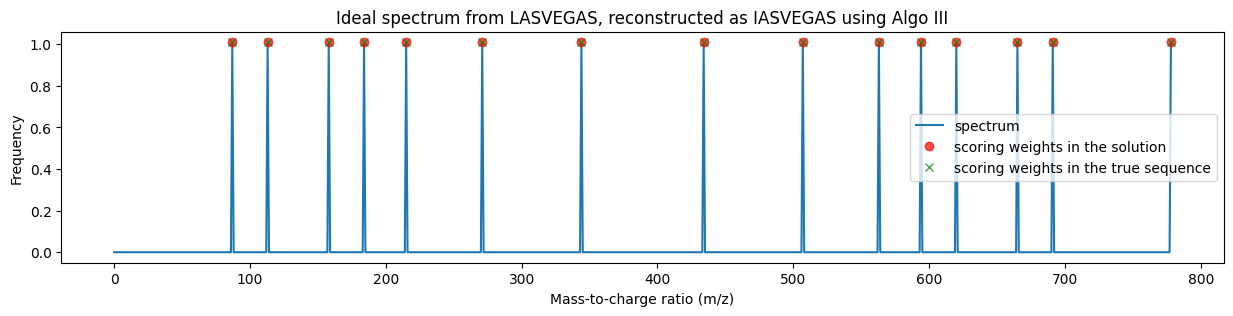

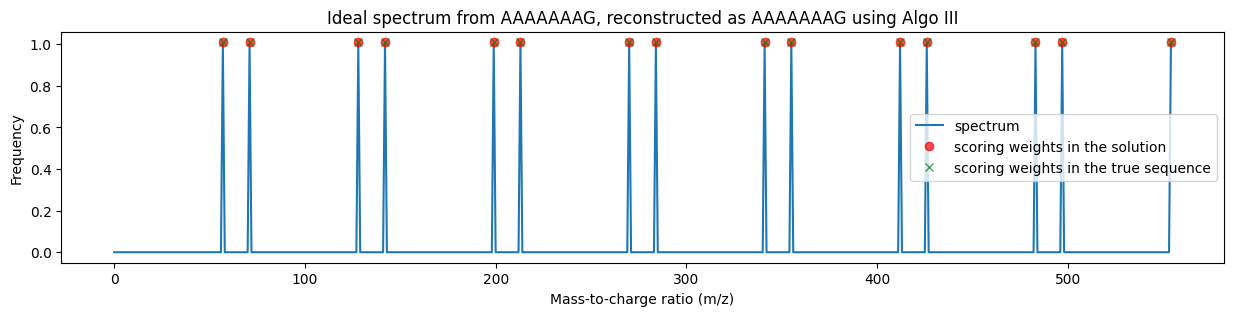

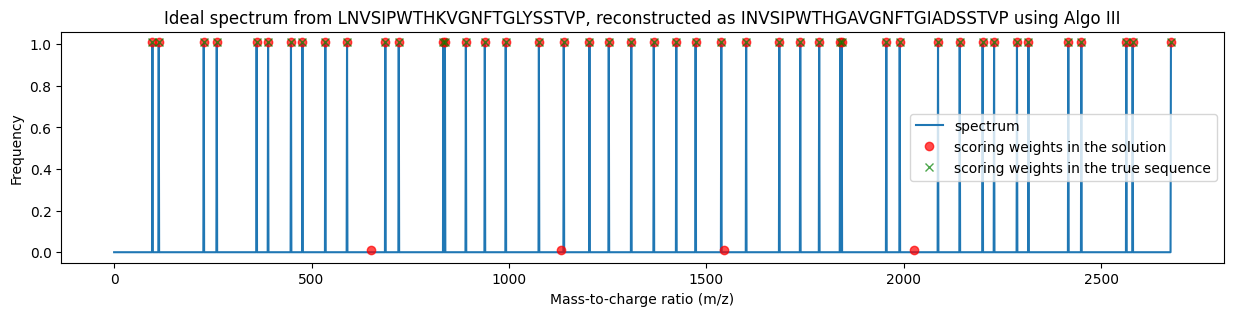

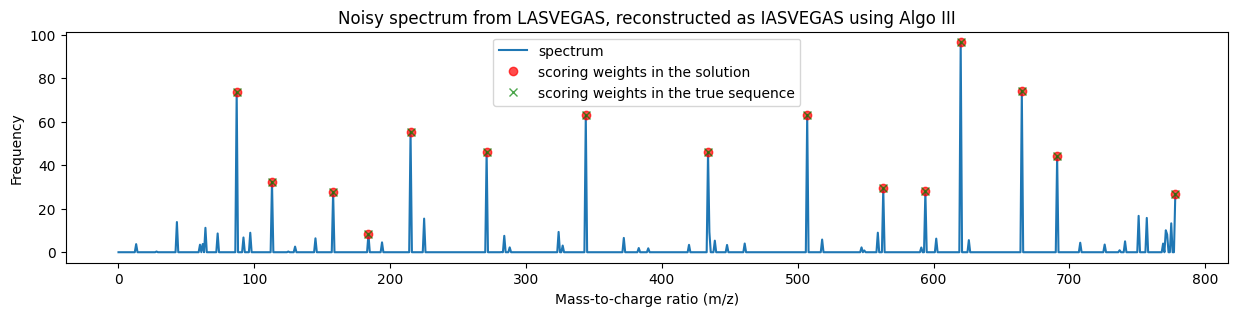

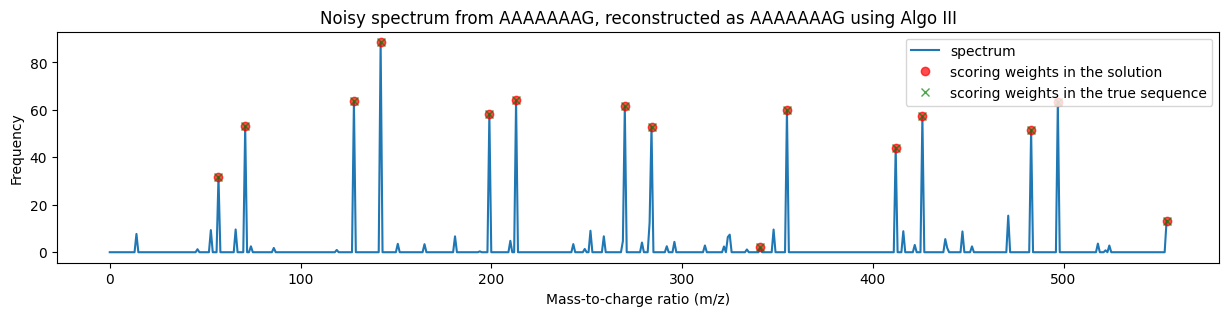

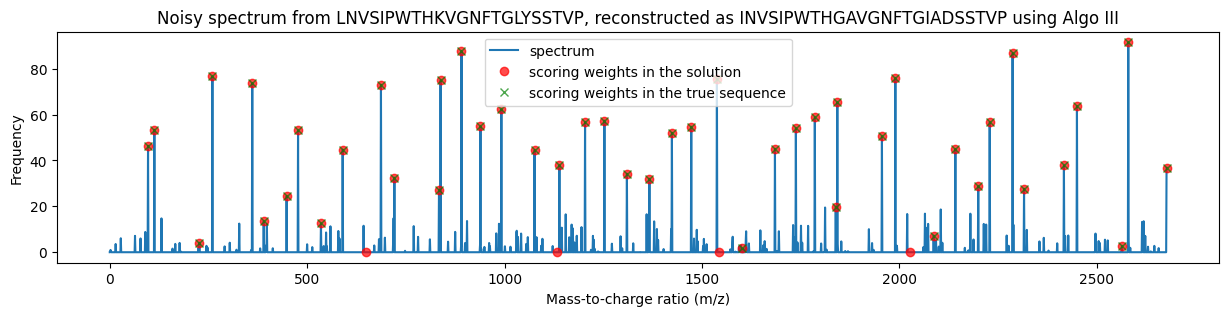

In [ ]:
def eval_metric_3(sequence, spectrum):
  prefix_weights = set(protein_weight(sequence[:i]) for i in range(1, len(sequence)+1))
  suffix_weights = set(protein_weight(sequence[i:]) for i in range(len(sequence)))
  result = sum(spectrum[x] for x in prefix_weights | suffix_weights if x < len(spectrum))
  return result


def reconstruct_protein_union(mass, spectrum):
  global amino_acids, amino_acids_weights
  H = np.zeros(mass // 2 + 1)
  for i in range(mass // 2 + 1):
    H[i] = spectrum[i] + spectrum[mass - i]
  if mass % 2 == 0:
    H[mass // 2] = spectrum[mass // 2]

  A = np.ones((mass // 2 + 1, mass // 2 + 1)) * (-1)
  A[0, 0] = spectrum[0]
  B = np.ones((mass // 2 + 1, mass // 2 + 1), dtype=int) * (-1)
  B[0, 0] = -1

  for p in range(mass // 2 + 1):
    if p % 200 == 0:
      print(f"Line #{p} of DP table...")
    for s in range(mass // 2 + 1):
      for i, weight in enumerate(amino_acids_weights):
        if p < s and s >= weight:
          candidate = A[p, s - weight] + H[s]
        elif p > s and p >= weight:
          candidate = A[p - weight, s] + H[p]
        elif p == s and p >= weight:
          candidate = A[p - weight, s]
        else:
          candidate = -1
        if candidate > A[p, s]:
          A[p, s] = candidate
          B[p, s] = i

  #plt.matshow(A)

  # reconstruction of the optimal solution
  best_p, best_s, intermediate_letter = None, None, None
  best_value = -math.inf

  max_w = np.max(amino_acids_weights)
  for p in range(mass // 2 - max_w, mass // 2):
    for i, weight in enumerate(amino_acids_weights):
      if mass - (left_mass := p + weight) <= mass // 2:
        suffix_mass = mass - left_mass
        candidate = A[p, suffix_mass]
        #print(f"{p=}, {i=}, {weight=}, {suffix_mass=} {candidate=}")
        if best_value < candidate:
          best_value = candidate
          best_p, best_s = p, suffix_mass
          intermediate_letter = amino_acids[i]
  if mass % 2 == 0 and (candidate := A[mass // 2, mass // 2]) > best_value:
    best_value = candidate
    best_p, best_s = mass // 2, mass // 2
    intermediate_letter = ""

  #print(best_p, best_s, intermediate_letter)

  residual_p, residual_s = best_p, best_s
  reversed_prefix = []
  suffix = []
  while residual_p > 0 or residual_s > 0:
    move = B[residual_p, residual_s]
    #print(f"{residual_p=}, {residual_s=}, {move=}")
    if residual_p >= residual_s:
      reversed_prefix.append(amino_acids[move])
      residual_p -= amino_acids_weights[move]
    else:
      suffix.append(amino_acids[move])
      residual_s -= amino_acids_weights[move]

  #print(f"{reversed_prefix=}")
  #print(f"{suffix=}")

  optimal_solution = "".join(reversed_prefix)[::-1] + intermediate_letter + "".join(suffix)

  return optimal_solution


for sn, spectrum_f in enumerate((ideal_spectrum, noisy_spectrum)):
  #for sequence in ("LASVEGAS",):
  for sequence in ("LASVEGAS", "AAAAAAAG", dna_polymerase):
    spectrum = spectrum_f(sequence)
    reconstructed_protein = reconstruct_protein_union(mass=protein_weight(sequence), spectrum=spectrum)
    fig, ax = plt.subplots(figsize=(15, 3))
    ax.set_xlabel("Mass-to-charge ratio (m/z)")
    ax.plot(spectrum, label="spectrum")
    ideal_reconstructed_spectrum = (ideal_spectrum(reconstructed_protein) > 0) * 1
    ideal_reconstructed_spectrum.resize(len(spectrum))
    used_values = ideal_reconstructed_spectrum * (spectrum + 0.01)
    ax.plot(np.arange(len(used_values))[used_values > 0], used_values[used_values > 0],
            'o', color="red", alpha=0.7, label="scoring weights in the solution")
    ideal_true_spectrum = (ideal_spectrum(sequence) > 0) * 1
    ideal_true_spectrum.resize(len(spectrum))
    used_true_values = ideal_true_spectrum * (spectrum + 0.01)
    ax.plot(np.arange(len(used_true_values))[used_true_values > 0], used_true_values[used_true_values > 0],
            'x', color="green", alpha=0.7, label="scoring weights in the true sequence")
    print(f"{'Ideal' if sn == 0 else 'Noisy'} from       {sequence} (mass={protein_weight(sequence)}, score={eval_metric_3(sequence, spectrum):.2f})")
    print(f"Reconstructed as {reconstructed_protein} (mass={protein_weight(reconstructed_protein)}, score={eval_metric_3(reconstructed_protein, spectrum):.2f})")
    ax.set_title(f"{'Ideal' if sn == 0 else 'Noisy'} spectrum from {sequence}, reconstructed as {reconstructed_protein} using Algo III")
    ax.set_ylabel("Frequency")
    ax.legend()
    fig.show()

In [ ]:
def compute_equally_weighing_combinations(max_mass=300):
  global amino_acids, amino_acids_weights
  K = len(amino_acids)
  combinations = [set() for _ in range(max_mass+1)]
  combinations[0] = set([tuple([0] * K)])
  for mass in range(max_mass+1):
    for i, (acid, weight) in enumerate(zip(amino_acids, amino_acids_weights)):
      if acid in "IQ" and mass > 128:
        continue # skipping I and Q, since it's equal to L and K, respectively
      residual_mass = mass - weight
      if residual_mass >= 0:
        for composition in combinations[residual_mass]:
          new_combination = list(composition)
          new_combination[i] += 1
          combinations[mass].add(tuple(new_combination))
  for mass in range(max_mass + 1):
    if len(combinations[mass]) > 1:
      print(f"{mass=} # combinations: {len(combinations[mass])}")
      for combination in combinations[mass]:
        print("".join(x * n for x, n in zip(amino_acids, combination)))

compute_equally_weighing_combinations()



mass=113 # combinations: 2
L
I
mass=114 # combinations: 2
N
GG
mass=128 # combinations: 3
Q
AG
K
mass=158 # combinations: 2
GT
AS
mass=170 # combinations: 2
GL
GI
mass=171 # combinations: 2
GGG
NG
mass=172 # combinations: 2
AT
DG
mass=174 # combinations: 2
SS
AC
mass=184 # combinations: 3
PS
AL
AI
mass=185 # combinations: 4
AN
GK
AGG
QG
mass=186 # combinations: 3
EG
AD
Y
mass=188 # combinations: 2
ST
GM
mass=194 # combinations: 2
GH
PP
mass=199 # combinations: 3
AAG
AK
AQ
mass=200 # combinations: 4
AE
CP
IS
LS
mass=201 # combinations: 2
NS
GGS
mass=202 # combinations: 3
DS
AM
TT
mass=204 # combinations: 2
CT
GF
mass=208 # combinations: 2
GW
AH
mass=210 # combinations: 2
IP
LP
mass=211 # combinations: 2
GGP
NP
mass=213 # combinations: 2
AAA
RG
mass=214 # combinations: 2
IT
LT
mass=215 # combinations: 5
QS
GGT
NT
AGS
KS
mass=216 # combinations: 4
CL
ES
DT
CI
mass=217 # combinations: 2
NC
CGG
mass=218 # combinations: 3
AF
DC
MS
mass=225 # combinations: 3
QP
AGP
KP
mass=226 # combinations: